In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Raw-Data/df4Xulu.csv')

data

,Unnamed: 0,channel,spike_timestamp_30khz,cluster_ID,photometry_timestamp_250Hz,x,y
0,0,53.0,38.0,127.0,0,NaN,NaN
1,1,56.0,49.0,133.0,0,NaN,NaN
2,2,95.0,87.0,261.0,0,NaN,NaN
3,3,39.0,140.0,88.0,1,NaN,NaN
4,4,27.0,193.0,53.0,1,NaN,NaN
...,...,...,...,...,...,...,...
3560413,3560413,95.0,107999888.0,261.0,899998,301.25,303.5
3560414,3560414,16.0,107999942.0,31.0,899998,301.25,303.5
3560415,3560415,56.0,107999970.0,133.0,899998,301.25,303.5
3560416,3560416,95.0,107999975.0,261.0,899998,301.25,303.5


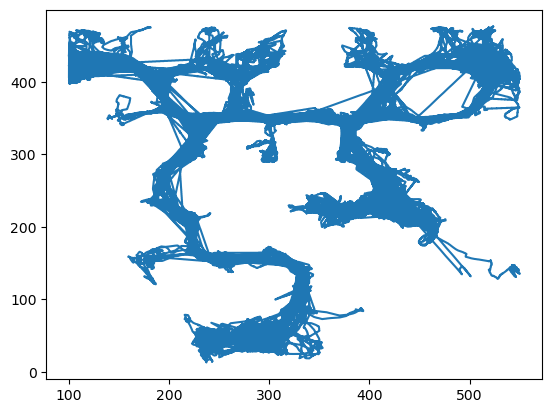

In [3]:
plt.plot(data.x, data.y)

In [4]:
position_info = data[["x", "y", "photometry_timestamp_250Hz"]].set_index("photometry_timestamp_250Hz").sort_index()
position_info = position_info.groupby("photometry_timestamp_250Hz").mean()
position_info

,x,y
photometry_timestamp_250Hz,,
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
899995,301.25,303.5
899996,301.25,303.5
899997,301.25,303.5


In [5]:
spike_times = data[["channel", "cluster_ID", "photometry_timestamp_250Hz"]].astype(int).set_index(["channel", "cluster_ID"]).sort_index()
spike_times

photometry_timestamp_250Hz
channel cluster_ID                            
11      12                                2440
        12                                2444
        12                                2449
        12                                2450
        12                                8399
...                                        ...
182     453                             899917
        453                             899922
        453                             899971
        453                             899982
        453                             899986

[3560418 rows x 1 columns]

In [6]:
spike_times.max()

photometry_timestamp_250Hz    899999
dtype: int64

In [14]:
n_cells = len(spike_times.index.unique())
n_time = int(data.photometry_timestamp_250Hz.max() + 1)

spikes = np.zeros((n_time, n_cells))

for cell_ind, (cell_id, spike_time_ind) in enumerate(spike_times.groupby(["channel", "cluster_ID"])):
    spikes[spike_time_ind, cell_ind] += 1

In [15]:
spikes.shape

(900000, 225)

In [16]:
position_info.shape

(807692, 2)

In [25]:
np.nonzero(~np.isin(np.arange(900_000), position_info.index))[0]

array([    21,     39,     40, ..., 899909, 899910, 899992])

In [26]:
np.nonzero(~np.isin(np.arange(900_000), position_info.index))[0].shape

(92308,)